In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'


sra_dump_df=pd.read_pickle(sra_dump_pickle_dir)

In [4]:
import os

In [148]:
myDict={'Allelic base counts':'/nrnb/users/btsui/Data/all_seq/snp/',
'Genome coverage counts':'/nrnb/users/btsui/Data/all_seq/chip/chip/',
        'Transcript counts':'/nrnb/users/btsui/Data/all_seq/rnaseq/'
       }
myDataDict={}
for Type, dataDir in  myDict.items():
    #break
    fnames=pd.Series(os.listdir(dataDir))
    myDataDict[Type]=fnames

In [149]:
for Type, fnames in  myDataDict.items():
    srrs=fnames.str.extract('(\wRR\d+)',expand=False).unique()
    sra_dump_df[Type]=sra_dump_df.index.isin(srrs)

In [278]:
sra_dump_df['ScientificName']=sra_dump_df['ScientificName'].astype(str)
sra_dump_df['ScientificName']=sra_dump_df['ScientificName'].str.replace('_',' ')
sra_dump_df['ScientificName']=sra_dump_df['ScientificName'].str.replace('Drosophila melanogaster','Drosophila\nmelanogaster')

In [ ]:
sra_dump_df['LibraryStrategy']=sra_dump_df['LibraryStrategy'].astype(str)

sra_dump_df['LibraryStrategy']=sra_dump_df['LibraryStrategy'].str.replace('DNase-Hypersensitivity','DNase-seq')

In [279]:
myDict={}
for Type  in myDataDict.keys():
    tmpS=sra_dump_df.groupby(['ScientificName','LibraryStrategy'])[Type].sum()
    myDict[Type]=tmpS[tmpS>100]
    #break

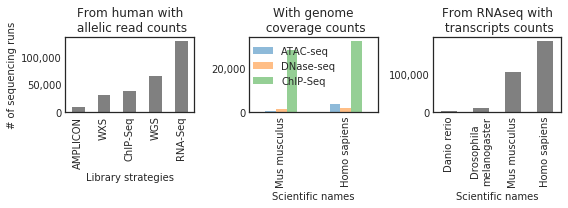

In [323]:
fig,axes=plt.subplots(ncols=3,sharey=False,figsize=(8,3))

tmpS=myDict['Allelic base counts']
ax=axes[0]
tmpS_sub=tmpS[~tmpS.index.get_level_values('ScientificName').astype(str).str.contains('metagenome')].loc['Homo sapiens']
tmpS_sub.sort_values().plot.bar(ax=ax,color='grey')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('# of sequencing runs')
ax.set_title('From human with\n allelic read counts')
ax.set_xlabel('Library strategies')
#ax.set_yscale('log10')


tmpS=myDict['Genome coverage counts']
ax=axes[1]
tmpS_sub=tmpS[~tmpS.index.get_level_values('ScientificName').astype(str).str.contains('metagenome')]#.loc['Homo_sapiens']
tmpS_sub.sort_values().unstack().plot.bar(ax=ax,alpha=0.5)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('With genome\n coverage counts')
ax.legend(loc=(0.0,0.3))
ax.set_xlabel('Scientific names')



tmpS=myDict['Transcript counts']
ax=axes[2]
tmpS_sub=tmpS[~tmpS.index.get_level_values('ScientificName').astype(str).str.contains('metagenome')]#.loc['Homo_sapiens']
tmpS_sub.sort_values().unstack().plot.bar(ax=ax,color='grey')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('From RNAseq with\n transcripts counts')
ax.legend(loc=(0.3,0.5),labels=[])
ax.set_xlabel('Scientific names')
fig.tight_layout()

#ax.set_ylabel('# of sequencing runs')

In [324]:
fig.savefig('../Figures/sra_data_processed.png',dpi=300)

In [325]:
fig.savefig('../Figures/sra_data_processed.pdf')

In [277]:
tmpS_sub

ScientificName           LibraryStrategy
Danio rerio              RNA-Seq              2594.0
Drosophila melanogaster  RNA-Seq             12133.0
Homo sapiens             RNA-Seq            188388.0
Mus musculus             RNA-Seq            107545.0
Name: Transcript counts, dtype: float64

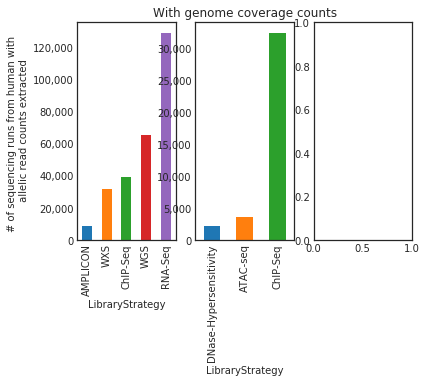

In [228]:
fig

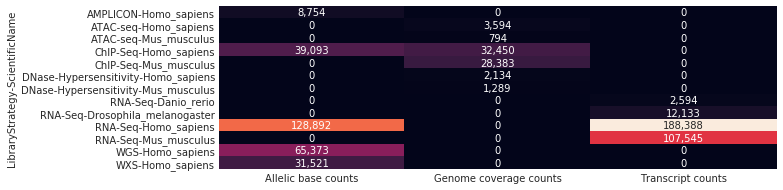

In [190]:
tmpMetaDf=pd.DataFrame(myDict).fillna(0)
inHmap=tmpMetaDf[~tmpMetaDf.index.get_level_values('ScientificName').str.contains('metagenome')].astype(int)
fig,ax=plt.subplots(figsize=(10,3))
sns.heatmap(data=inHmap,
            annot=True,cbar_kws={'label':'# of sequencing run processed'},fmt=',',ax=ax,cbar=False)#fmt = ''
#ax.set_ylabel('')


In [196]:
#inHmap

In [158]:
sra_dump_sub_df=sra_dump_df[sra_dump_df['SNP']]

In [82]:
countS=sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values().loc['Homo_sapiens']

In [94]:
import matplotlib

KeyboardInterrupt: 

Text(0,0.5,'# of sequencing runs from human')

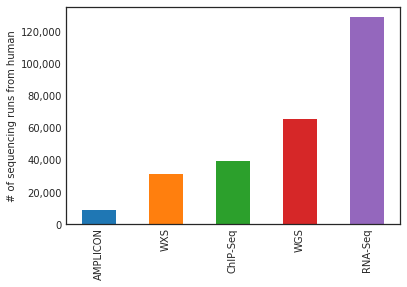

In [101]:
ax=countS.plot.bar()
ax.set_xlabel('')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('# of sequencing runs from human')

In [102]:
myDict={}
myDict['SNP']=sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values().loc[['Homo_sapiens']]

In [76]:
sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values().loc[['Homo_sapiens']]

ScientificName  LibraryStrategy       
Homo_sapiens    RNA-Seq                       1
                DNase-Hypersensitivity     2134
                ATAC-seq                   3594
                ChIP-Seq                  32450
dtype: int64

In [103]:
sra_dump_sub_df=sra_dump_df[sra_dump_df['Immunoprecipitation']]

In [104]:
sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values()

ScientificName  LibraryStrategy       
Homo_sapiens    RNA-Seq                       1
Mus_musculus    ATAC-seq                    794
                DNase-Hypersensitivity     1289
Homo_sapiens    DNase-Hypersensitivity     2134
                ATAC-seq                   3594
Mus_musculus    ChIP-Seq                  28383
Homo_sapiens    ChIP-Seq                  32450
dtype: int64

In [73]:
tmpS=sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values()
myDict['Immunoprecipitation']=tmpS[tmpS>1]

In [74]:
pd.DataFrame(myDict)

SNP  Immunoprecipitation
ScientificName LibraryStrategy                                      
Homo_sapiens   AMPLICON                  8754.0                  NaN
               ATAC-seq                     NaN               3594.0
               ChIP-Seq                 39093.0              32450.0
               DNase-Hypersensitivity       NaN               2134.0
               RNA-Seq                 128892.0                  NaN
               WGS                      65373.0                  NaN
               WXS                      31521.0                  NaN
Mus_musculus   ATAC-seq                     NaN                794.0
               ChIP-Seq                     NaN              28383.0
               DNase-Hypersensitivity       NaN               1289.0

In [57]:
sra_dump_sub_df=sra_dump_df[sra_dump_df['Transcript counts']]

In [63]:
tmpS=sra_dump_sub_df.groupby(['ScientificName','LibraryStrategy']).size().sort_values()
tmpS[tmpS>2000]

ScientificName           LibraryStrategy
Danio_rerio              RNA-Seq              2594
Drosophila_melanogaster  RNA-Seq             12133
Mus_musculus             RNA-Seq            107545
Homo_sapiens             RNA-Seq            188388
dtype: int64

In [21]:
###annotate directly the data that fall into each folder
#sra_dump_df.index.isin(srrs)

303829

In [27]:
fnames=os.listdir('/nrnb/users/btsui/Data/all_seq/rnaseq/')

In [32]:
#fnames[:4]